## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
display_data = mouse_metadata.merge(study_results)
display_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

t_volume = display_data["Tumor Volume (mm3)"]

In [7]:
#Calculating mean, median, and mode values of the data table

mean_volume = np.mean(t_volume)
median_volume = np.mean(t_volume)
mode_volume = st.mode(t_volume)

#Calculating standard deviation, variance, and SEM

var_volume = np.var(t_volume, ddof=0)
sd_volume = np.std(t_volume, ddof=0)

mean_volume

50.448380631336505

In [8]:
sem_volume = st.sem(display_data["Tumor Volume (mm3)"])

In [9]:
stat_data = {'Statistics':[mean_volume, median_volume, mode_volume, sd_volume, var_volume, sem_volume]}

stat_volume = pd.DataFrame(stat_data, index=['Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance', 'SEM Value'])
stat_volume

,Statistics
Mean,50.4484
Median,50.4484
Mode,"([45.0], [250])"
Standard Deviation,8.89237
Variance,79.0743
SEM Value,0.204436


## Bar plots

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [11]:
count_index = pd.Series([0,1,2,4,5,6,7,8,9,10])
count_data = pd.DataFrame(display_data['Drug Regimen'].value_counts())
count_list = count_data.values.tolist()
count_list

count_list_data = pd.DataFrame(count_list)
count_list_data.columns = ['Drug Count']
count_list_data

,Drug Count
0,230
1,228
2,188
3,186
4,182
5,181
6,181
7,178
8,178
9,161


In [12]:
drug_regimen = display_data['Drug Regimen'].drop_duplicates(keep='first', inplace=False)
data_drug = pd.DataFrame(drug_regimen)
drug_list = data_drug.values.tolist()
drug_list

drug_list_data = pd.DataFrame(drug_list)
drug_list_data

drug_list_data.columns = ['Drug Regimen']
drug_list_data

,Drug Regimen
0,Ramicane
1,Capomulin
2,Infubinol
3,Placebo
4,Ceftamin
5,Stelasyn
6,Zoniferol
7,Ketapril
8,Propriva
9,Naftisol


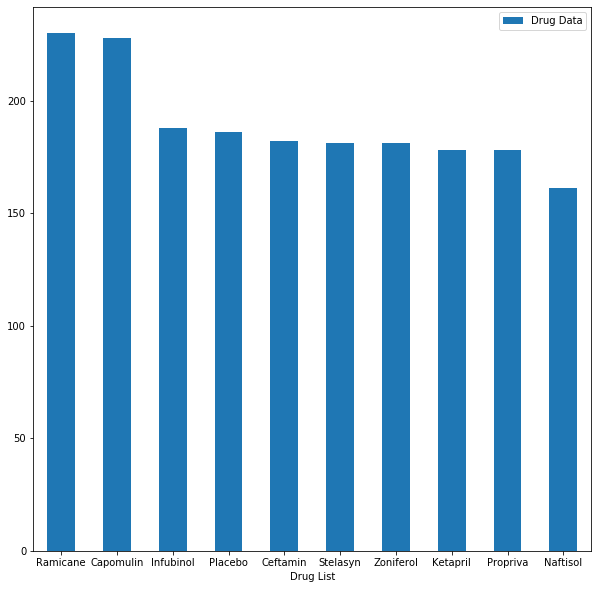

In [13]:
df_drug = pd.DataFrame({'Drug List':drug_list_data['Drug Regimen'], 'Drug Data':count_list_data['Drug Count']})
axis = df_drug.plot.bar(x='Drug List', y='Drug Data', rot=0, figsize=(10,10))

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(drug_list_data['Drug Regimen']))
y_axis = display_data['Drug Regimen'].value_counts().tolist()
y_axis

[230, 228, 188, 186, 182, 181, 181, 178, 178, 161]

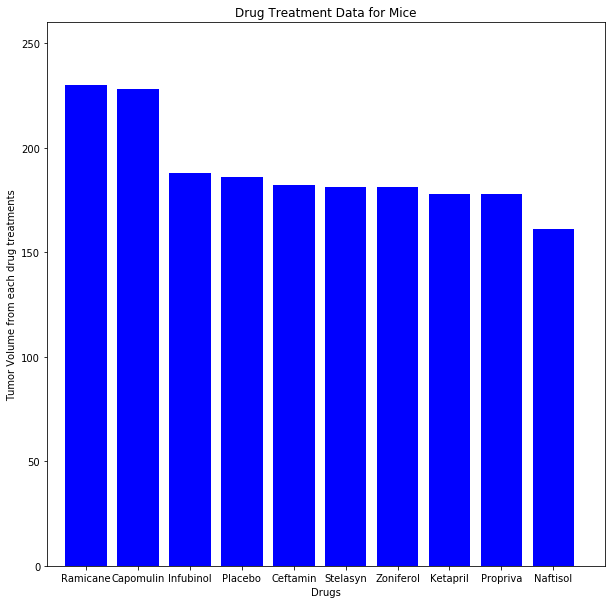

In [16]:
plt.figure(figsize=(10,10))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list_data['Drug Regimen'])

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(y_axis)+30.00)

plt.title('Drug Treatment Data for Mice')
plt.xlabel('Drugs')
plt.ylabel('Tumor Volume from each drug treatments')

bar_graph = plt.bar(x_axis, y_axis, color='b', align='center')

## Pie plots

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = display_data['Sex']
sex_data

0         Male
1         Male
2         Male
3         Male
4         Male
5         Male
6         Male
7         Male
8         Male
9         Male
10      Female
11      Female
12      Female
13      Female
14      Female
15      Female
16      Female
17      Female
18      Female
19      Female
20      Female
21      Female
22      Female
23      Female
24      Female
25      Female
26      Female
27      Female
28      Female
29      Female
         ...  
1863    Female
1864    Female
1865    Female
1866    Female
1867    Female
1868    Female
1869    Female
1870    Female
1871    Female
1872    Female
1873    Female
1874    Female
1875    Female
1876    Female
1877    Female
1878    Female
1879    Female
1880    Female
1881    Female
1882    Female
1883      Male
1884      Male
1885      Male
1886      Male
1887      Male
1888      Male
1889      Male
1890      Male
1891      Male
1892      Male
Name: Sex, Length: 1893, dtype: object

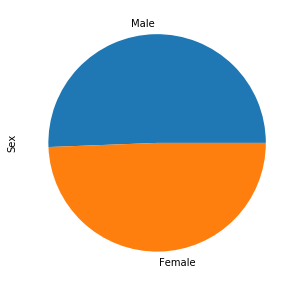

In [19]:
df_male_female = sex_data.value_counts()
plot = df_male_female.plot.pie(y='Number of Sex Distribution', figsize=(5,5))

(-1.200731136364239,
 1.1398236054854594,
 -1.1645989650700113,
 1.1383790125152746)

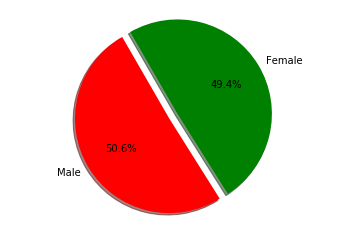

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_data.value_counts().index.tolist()
male_female = sex_data.value_counts().tolist()


colors = ['red', 'green']
explode = (0.1, 0)

plt.pie(male_female, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

## Quartiles, outliers and boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

mouse_ID = display_data['Mouse ID'].drop_duplicates(keep='first', inplace=False)
data_mouse = pd.DataFrame(mouse_ID)
data_mouse = data_mouse.values.tolist()

final_volume = display_data.loc[display_data['Timepoint'] >= 45]
final_capo_volume = final_volume.loc[final_volume['Drug Regimen'] == 'Capomulin']
final_rami_volume = final_volume.loc[final_volume['Drug Regimen'] == 'Ramicane']
final_infub_volume = final_volume.loc[final_volume['Drug Regimen'] == 'Infubinol']
final_ceft_volume = final_volume.loc[final_volume['Drug Regimen'] == 'Ceftamin']

final_four_volume = pd.concat([final_capo_volume, final_rami_volume, final_infub_volume, final_ceft_volume])
final_four_volume.reset_index()

volume_stat = final_four_volume['Tumor Volume (mm3)']

quartiles = volume_stat.quantile([0.25, 0.5, 0.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound.round(decimals=2)} may be outliers.')
print(f'Values above {upper_bound.round(decimals=2)} may be outliers.')
print(f'The following is the statistical summary across the most promising treatment regimens, in each mice tumor volume')

stat_summary = final_four_volume['Tumor Volume (mm3)'].describe()
stat_volume = pd.DataFrame(stat_summary)
stat_volume

Values below -9.51 may be outliers.
Values above 105.14 may be outliers.
The following is the statistical summary across the most promising treatment regimens, in each mice tumor volume


,Tumor Volume (mm3)
count,63.000000
mean,45.803045
std,14.836926
min,22.050126
25%,33.480027
50%,40.159220
75%,62.142214
max,72.226731


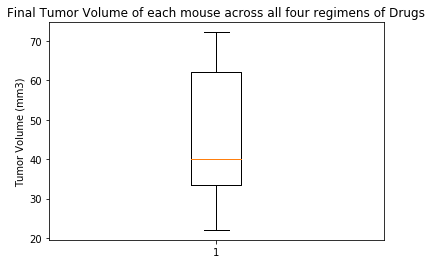

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_volume = final_four_volume['Tumor Volume (mm3)'].tolist()
four_volume.sort()

blue_circles = dict(markerfacecolor='b', marker='o')

fig3, ax3 = plt.subplots()
ax3.set_title('Final Tumor Volume of each mouse across all four regimens of Drugs')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(four_volume, flierprops=blue_circles)

plt.show()

## Line and scatter plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capo_volume = display_data.loc[display_data['Drug Regimen'] == "Capomulin"]
capo_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [25]:
s185_volume = capo_volume.loc[capo_volume['Mouse ID'] == 's185']
s185_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


C:\Users\dntjd\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0, 0.5, 'Tumor Volume (mm3)')

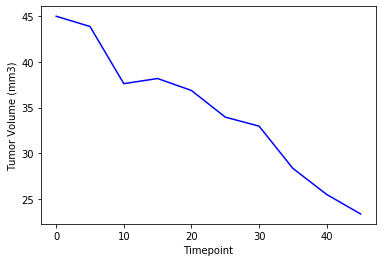

In [26]:
s185_volume.drop(['Age_months', 'Weight (g)', 'Metastatic Sites'], axis=1, inplace=True)

s185_timepoint = s185_volume['Timepoint']
s185_tvolume = s185_volume['Tumor Volume (mm3)']

line_s185 = plt.plot(s185_timepoint, s185_tvolume, color='blue', label=s185_timepoint)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Weight (g)')

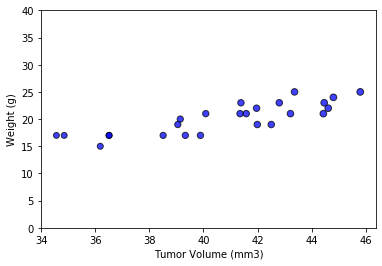

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

x_limit = 100

mean_data = capo_volume[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]].groupby(["Mouse ID"]).mean()

x_v_axis = mean_data['Tumor Volume (mm3)']
y_w_axis = mean_data['Weight (g)']

plt.scatter(x_v_axis, y_w_axis, marker='o', facecolors='blue', edgecolors='black', s=x_v_axis, alpha=0.75)
plt.ylim(0, 40)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

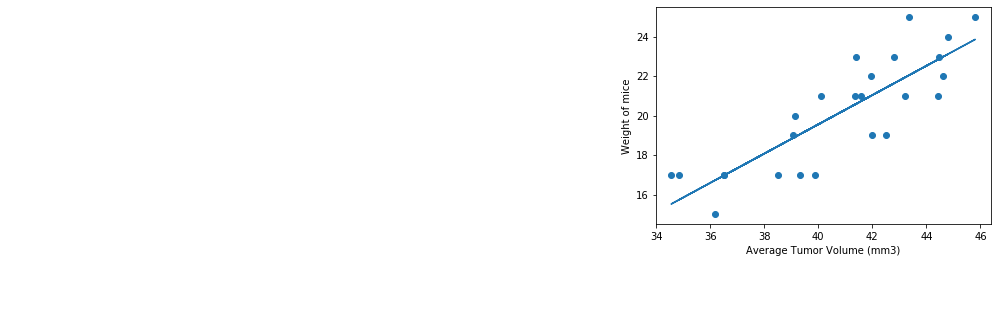

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen
x_value = x_v_axis
y_value = y_w_axis

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values)
plt.annotate(line_eq, (10,10), fontsize=15, color='blue')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight of mice')

plt.show()